In [175]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [9]:
df2 = df.drop(columns = ['Outlet_Identifier','Item_Identifier','source'],axis = 1)
df2.isna().sum()

Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [8]:
df3 = df2.dropna()
df3.shape

(4650, 10)

In [16]:
df3.head()
cols = df3.columns.tolist()
df3.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
5,10.395,Regular,0.000000,Baking Goods,51.4008,2009,Medium,Tier 3,Supermarket Type2,556.6088


In [21]:
Y = df3.Item_Outlet_Sales
X = df3.drop(['Item_Outlet_Sales','Outlet_Establishment_Year'], axis = 1)

In [28]:
X['fat'] = X.Item_Fat_Content.apply(lambda x: 'L' if x == 'Low Fat' or 'LF' or 'low fat' else 'R')

In [32]:
X.drop('Item_Fat_Content',axis = 1,inplace = True)


KeyError: "['Item_Fat_Content'] not found in axis"

In [38]:
X['LF'] = X.fat.apply(lambda x : 1 if x == 'L' else 0)
X['Type_1'] = X.Outlet_Type.apply(lambda x : 1 if x == 'Supermarket Type1' else 0)

In [42]:
X.drop(['Outlet_Type','fat'],axis = 1,inplace = True)
X.head()

KeyError: "['Outlet_Type', 'fat'] not found in axis"

In [44]:
# encoding 
X.Outlet_Size.unique()
X.Outlet_Size = X.Outlet_Size.apply(lambda x: 0.33 if x == 'Small' else (0.66 if x == 'Medium' else 0.99))
X.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,LF,Type_1
0,9.300,0.016047,Dairy,249.8092,0.66,Tier 1,1,1
1,5.920,0.019278,Soft Drinks,48.2692,0.66,Tier 3,1,0
2,17.500,0.016760,Meat,141.6180,0.66,Tier 1,1,1
4,8.930,0.000000,Household,53.8614,0.99,Tier 3,1,1
5,10.395,0.000000,Baking Goods,51.4008,0.66,Tier 3,1,0


In [80]:
Type = X.Item_Type
data = pd.DataFrame({'Item_Type':Type})
data.head()

,Item_Type
0,Dairy
1,Soft Drinks
2,Meat
4,Household
5,Baking Goods


In [77]:
coder = OneHotEncoder()
coded_data = coder.fit_transform(data)

In [112]:
cols = Type
cols
X_n = X.drop(['Item_Type'],axis = 1 )
X_n.Outlet_Location_Type = X_n.Outlet_Location_Type.apply(lambda x: 1 if x == 'Tier 1' else (2 if x == 'Tier 2' else 3))

In [117]:
X_train,X_test,y_train,y_test = train_test_split(X_n,Y,test_size= 0.2,random_state=1)

In [118]:
model_02 = LinearRegression()
model_02.fit(X_train,y_train)

LinearRegression()

In [142]:
y_pred = model_02.predict(X_test)
y_test_n = np.array(y_test)

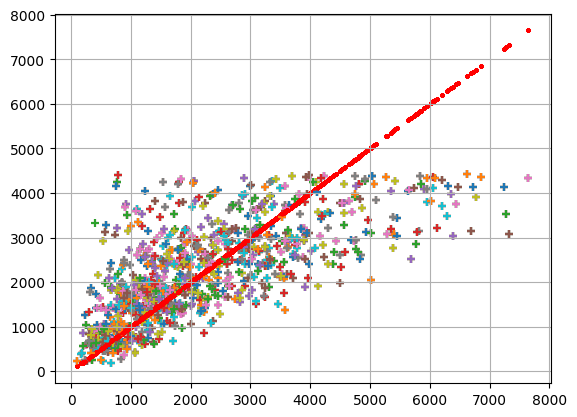

In [173]:
plt.grid()
x = np.linspace(0,5000,10000)
for g in range(0,5000):  
    plt.scatter(y_test_n[g-10:g],y_pred[g-10:g],marker = '+')
    plt.scatter(y_test_n[g-10:g],y_test_n[g-10:g],marker = '.',color = 'red',linewidths=0.1)